In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, classification_report
from sklearn.preprocessing import MinMaxScaler 
from sklearn.neural_network import MLPClassifier 
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Read Data
df = pd.read_csv('/Applications/Hobbys/Bitcoin Price Predition/Data/Binance_BTCUSDT_d.csv', skiprows=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unix         1272 non-null   float64
 1   date         1272 non-null   object 
 2   symbol       1272 non-null   object 
 3   open         1272 non-null   float64
 4   high         1272 non-null   float64
 5   low          1272 non-null   float64
 6   close        1272 non-null   float64
 7   Volume BTC   1272 non-null   float64
 8   Volume USDT  1272 non-null   float64
 9   tradecount   1148 non-null   float64
dtypes: float64(8), object(2)
memory usage: 99.5+ KB


In [3]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1.612656e+12,2021-02-07 00:00:00,BTC/USDT,39181.01,39241.20,38701.00,39117.51,1471.943684,5.732219e+07,24767.0
1,1.612570e+12,2021-02-06 00:00:00,BTC/USDT,38289.32,40955.51,38215.94,39186.94,98757.311183,3.922095e+09,2291646.0
2,1.612483e+12,2021-02-05 00:00:00,BTC/USDT,36936.65,38310.12,36570.00,38290.24,66681.334275,2.509278e+09,1853253.0
3,1.612397e+12,2021-02-04 00:00:00,BTC/USDT,37620.26,38708.27,36161.95,36936.66,92080.735898,3.452669e+09,2211866.0
4,1.612310e+12,2021-02-03 00:00:00,BTC/USDT,35472.71,37662.63,35362.38,37618.87,80784.333663,2.951233e+09,1881740.0


# Step 1: First Preprocessing

In [4]:
# Delete useless Columns
df = df.drop(columns=['unix', 'symbol'])
df.head()

,date,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,2021-02-07 00:00:00,39181.01,39241.20,38701.00,39117.51,1471.943684,5.732219e+07,24767.0
1,2021-02-06 00:00:00,38289.32,40955.51,38215.94,39186.94,98757.311183,3.922095e+09,2291646.0
2,2021-02-05 00:00:00,36936.65,38310.12,36570.00,38290.24,66681.334275,2.509278e+09,1853253.0
3,2021-02-04 00:00:00,37620.26,38708.27,36161.95,36936.66,92080.735898,3.452669e+09,2211866.0
4,2021-02-03 00:00:00,35472.71,37662.63,35362.38,37618.87,80784.333663,2.951233e+09,1881740.0


In [5]:
# Prepare date, because there are no time informations
df['date'] = df['date'].astype(str)
df['date'] = pd.to_datetime(pd.Series(df['date']))
df.head()

,date,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,2021-02-07,39181.01,39241.20,38701.00,39117.51,1471.943684,5.732219e+07,24767.0
1,2021-02-06,38289.32,40955.51,38215.94,39186.94,98757.311183,3.922095e+09,2291646.0
2,2021-02-05,36936.65,38310.12,36570.00,38290.24,66681.334275,2.509278e+09,1853253.0
3,2021-02-04,37620.26,38708.27,36161.95,36936.66,92080.735898,3.452669e+09,2211866.0
4,2021-02-03,35472.71,37662.63,35362.38,37618.87,80784.333663,2.951233e+09,1881740.0


In [6]:
# Check Null Values
df.isnull().sum()

date             0
open             0
high             0
low              0
close            0
Volume BTC       0
Volume USDT      0
tradecount     124
dtype: int64

In [7]:
# Delete Nulls
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1148 entries, 0 to 1147
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1148 non-null   datetime64[ns]
 1   open         1148 non-null   float64       
 2   high         1148 non-null   float64       
 3   low          1148 non-null   float64       
 4   close        1148 non-null   float64       
 5   Volume BTC   1148 non-null   float64       
 6   Volume USDT  1148 non-null   float64       
 7   tradecount   1148 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 80.7 KB


# Step 2: Analyse Data

Mean open: 9607.809181184683 - Mean tradecount: 540146.8118466899
Median open: 8532.619999999999 - Median tradecount: 364875.0
Mode open: 0     9230.0
1    13500.0
dtype: float64 - Mode tradecount: 0    350662.0
dtype: float64


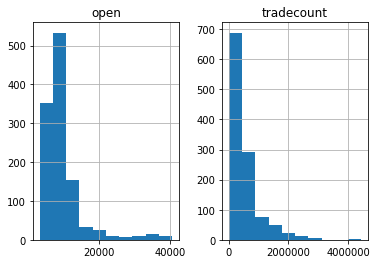

In [8]:
hist = df.hist(column=['open', 'tradecount'])

print('Mean open:', df['open'].mean(), '- Mean tradecount:', df['tradecount'].mean())
print('Median open:', df['open'].median(), '- Median tradecount:', df['tradecount'].median())
print('Mode open:', df['open'].mode(), '- Mode tradecount:', df['tradecount'].mode())

Mean High: 9894.596576655065 - Mean low: 9280.845365853642
Median High: 8771.435000000001 - Median low: 8214.009999999998
Mode High: 0    6360.0
1    7750.0
2    9395.0
dtype: float64 - Mode low: 0    10080.0
1    10200.0
dtype: float64


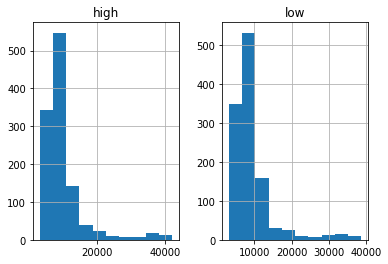

In [9]:
hist = df.hist(column=['high', 'low'])

print('Mean High:', df['high'].mean(), '- Mean low:', df['low'].mean())
print('Median High:', df['high'].median(), '- Median low:', df['low'].median())
print('Mode High:', df['high'].mode(), '- Mode low:', df['low'].mode())

Mean Volume BTC: 51008.88465414367 - Mean Volume USDT: 561301250.3939104
Median Volume BTC: 42150.923892499995 - Median Volume USDT: 347928911.29765725
Mode Volume BTC: 0         1471.943684
1         1521.537318
2         5743.933728
3         6515.357792
4         7661.241476
            ...      
1143    227276.922760
1144    231827.005626
1145    249131.539943
1146    261505.608653
1147    402201.673764
Length: 1148, dtype: float64 - Mode Volume USDT: 0       1.177017e+07
1       3.729836e+07
2       4.314640e+07
3       4.893424e+07
4       4.974531e+07
            ...     
1143    4.651302e+09
1144    5.062570e+09
1145    5.568443e+09
1146    8.195593e+09
1147    8.426880e+09
Length: 1148, dtype: float64


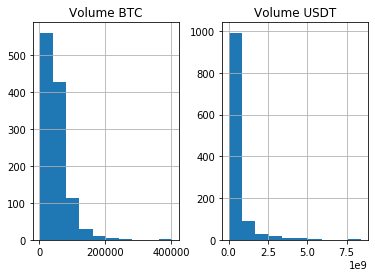

In [10]:
hist = df.hist(column=['Volume BTC', 'Volume USDT'])

print('Mean Volume BTC:', df['Volume BTC'].mean(), '- Mean Volume USDT:', df['Volume USDT'].mean())
print('Median Volume BTC:', df['Volume BTC'].median(), '- Median Volume USDT:', df['Volume USDT'].median())
print('Mode Volume BTC:', df['Volume BTC'].mode(), '- Mode Volume USDT:', df['Volume USDT'].mode())

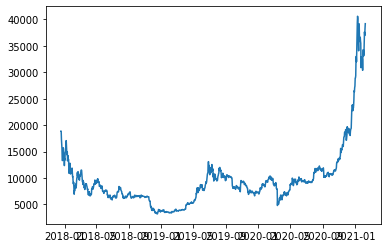

In [11]:
# Compare Time to open
plt.plot(df['date'], df['open'])
plt.show()

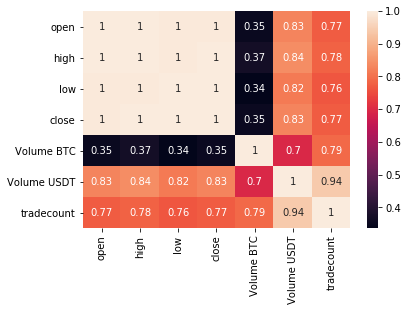

In [12]:
# Correlation Matrix for Feature Selection
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Feature Selection

In [13]:
# Delete Values that are not important for Trading Model
df = df[['date', 'open', 'high', 'low', 'close', 'Volume USDT']]
df.describe()

,open,high,low,close,Volume USDT
count,1148.000000,1148.000000,1148.000000,1148.000000,1.148000e+03
mean,9607.809181,9894.596577,9280.845366,9625.458859,5.613013e+08
std,5937.685475,6223.836297,5634.629300,5994.970856,7.577237e+08
min,3211.710000,3276.500000,3156.260000,3211.720000,1.177017e+07
25%,6597.355000,6714.700000,6464.187500,6595.852500,2.169011e+08
50%,8532.620000,8771.435000,8214.010000,8536.940000,3.479289e+08
75%,10387.957500,10710.152500,10100.750000,10388.305000,5.751823e+08
max,40586.960000,41950.000000,38720.000000,40582.810000,8.426880e+09


# New Attributes - Daily Return

The Daily Return gives an overview about the percentage change, from a closing price between two days. For example, the 5 May 2020 price was 30.97 and the 6 May price was 29.72, the daily return is [(29.72/30.97)-1] * 100 = -(4.03)%.'

Daily percentage change:
Average daily return: 0.03%
Average Volatility: 4.40%


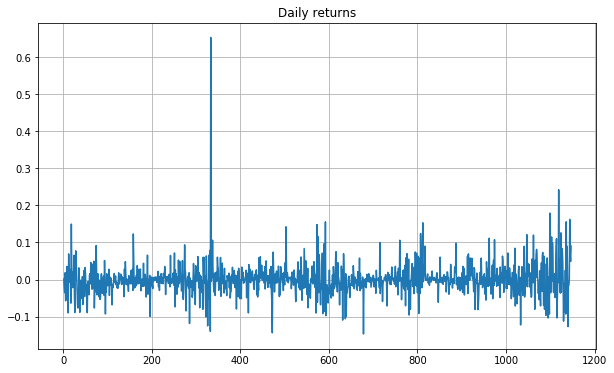

In [14]:
# Daily percentage change
print('Daily percentage change:')
daily_ret = df['close'].pct_change().dropna()
mean_ret = daily_ret.mean()
return_stdev = daily_ret.std()
print('Average daily return: %1.2f%%' % round((mean_ret*100), 2))
print('Average Volatility: %1.2f%%' % round((return_stdev*100), 2))

# Graph
daily_ret.plot(figsize=(10,6), grid=True)
plt.title('Daily returns')
plt.show()

# New Attribute - Volatility

The risk is given by the volatility. The volatility is the std deviation of daily stock price.

In [15]:
# Check how often the probability changes between 1%, 3% and 5%

print('Probability of +/-(1%); +/-(3%); +/-%(5) change in price')

print('The probability of price changes between 1%% and -1%% is %1.2f%% ' %
     (100*daily_ret[(daily_ret > -0.01) & (daily_ret < 0.01)].shape[0] / daily_ret.shape[0]))
print('The probability of price changes between 3%% and -3%% is %1.2f%% ' %
     (100*daily_ret[(daily_ret > -0.03) & (daily_ret < 0.03)].shape[0] / daily_ret.shape[0]))
print('The probability of price changes between 5%% and -5%% is %1.2f%% ' %
     (100*daily_ret[(daily_ret > 0.05)].shape[0] / daily_ret.shape[0]))
print('The probability of price changes more than 5%% is %1.2f%% ' %
     (100*daily_ret[(daily_ret > 0.05)].shape[0] / daily_ret.shape[0]))
print('The probability of price changes less than -5%% is %1.2f%% ' %
     (100*daily_ret[(daily_ret < -0.05)].shape[0] / daily_ret.shape[0]))


Probability of +/-(1%); +/-(3%); +/-%(5) change in price
The probability of price changes between 1% and -1% is 34.79% 
The probability of price changes between 3% and -3% is 68.88% 
The probability of price changes between 5% and -5% is 8.63% 
The probability of price changes more than 5% is 8.63% 
The probability of price changes less than -5% is 7.41% 


# Final Table for Machine Learning Model
In this section every column like RSI will added to the table to develop an Machine Learning Model

In [16]:
# New Column Settle which is the differnt between High and Low
df['settle'] = df['high'] - df['low']

# Set Date column as Index
df.set_index('date', inplace=True)
df.head()


# Dataframe Information as Columns 
def collectColumns():
    newdf = df[['open', 'high', 'low', 'settle', 'Volume USDT']]
    newdf= newdf.fillna(method='ffill')
    return newdf

newdf = collectColumns()
print(newdf.head()); print()
print(newdf.isnull().sum()); print()
print(newdf.describe().transpose())



                open      high       low   settle   Volume USDT
date                                                           
2021-02-07  39181.01  39241.20  38701.00   540.20  5.732219e+07
2021-02-06  38289.32  40955.51  38215.94  2739.57  3.922095e+09
2021-02-05  36936.65  38310.12  36570.00  1740.12  2.509278e+09
2021-02-04  37620.26  38708.27  36161.95  2546.32  3.452669e+09
2021-02-03  35472.71  37662.63  35362.38  2300.25  2.951233e+09

open           0
high           0
low            0
settle         0
Volume USDT    0
dtype: int64

              count          mean           std           min           25%  \
open         1148.0  9.607809e+03  5.937685e+03  3.211710e+03  6.597355e+03   
high         1148.0  9.894597e+03  6.223836e+03  3.276500e+03  6.714700e+03   
low          1148.0  9.280845e+03  5.634629e+03  3.156260e+03  6.464188e+03   
settle       1148.0  6.137512e+02  7.931059e+02  3.054000e+01  2.173950e+02   
Volume USDT  1148.0  5.613013e+08  7.577237e+08  1.177017

In [17]:
def features():
    # Copy of newdf
    newDf = newdf.copy()
    
    # Transfer values to pct_change
    newDf['settle'] = newDf['settle'].pct_change()
    newDf['high'] = newDf['high'].pct_change()
    newDf['low'] = newDf['low'].pct_change()
    newDf['Volume USDT'] = newDf['Volume USDT'].pct_change()
    
    # New Column dailyChange
    df['dailyChange'] = (df['settle'] - df['open']) / df['open']
    
    # EMA Column
    '''
        Exponential Moving Average (EMA):
        EMA is a type of weighted moving average that gives more weighting or importance 
        to recent price data. Difference with simple moving average is that, 
        an exponentially weighted moving average reacts more significantly to recent 
        price changes and applies an equal weight to all observations in the period.
    '''
    newDf['5EMA'] = (newDf['settle'].ewm(span=5,adjust=True,ignore_na=True).mean())
    newDf['10EMA'] = (newDf['settle'].ewm(span=10,adjust=True,ignore_na=True).mean())
    
    # new Column pricedirection measured on settle
    newDf['priceDirection'] = (newDf['settle'].shift(-1) - newDf['settle'])
    
    
    # new Relative Strength Index (RSI) column
    '''
        Measures the relative size of recent upward trends against the size 
        of downward trends within the specified time interval (usually 9–14 days).
    '''
    rsi_period = 14
    chg = newDf['settle'].diff(1)
    gain = chg.mask(chg<0,0)
    loss = chg.mask(chg>0,0)
    avg_gain = gain.ewm(com = rsi_period - 1, min_periods = rsi_period).mean()
    avg_loss = loss.ewm(com = rsi_period - 1, min_periods = rsi_period).mean()
    rs = abs(avg_gain/avg_loss)
    newDf['rsi'] = 100-(100/(1+ rs))
    
    
    # New column Standard deviation
    newDf['Std_dev']=  df['settle'].rolling(5).std()
    
    # Rate of Change (ROC) column
    ''' 
        The ratio of the current price to the price n quotes earlier. n is generally 5 to 10 days.
    '''
    newDf['ROC'] = ((newDf['settle'] - newDf['settle'].shift(5)) / (newDf['settle'].shift(5)))*100
    
    # Williams %R:
    '''
        It is a type of momentum indicator that moves between 0 and -100 
        and measures overbought and oversold levels. The Williams %R used to find entry 
        and exit points in the market.
    '''
    newDf['Williams%R'] = (newDf['high'].max() - newDf['settle'])/(newDf['high'] - newDf['low'].min()) * -100
    
    # Null-Werte entfernen
    newDf = newDf.replace([np.inf, -np.inf], np.nan)
    newDf.dropna(inplace=True)
    
    # Definition der signal column die vorhergesagt wird
    newDf['signal'] = 0.0
    newDf['signal'] = np.where((newDf.loc[:,'priceDirection'] > 0), 1.0, 0.0)
                 
    # Entfernen unrelevanter Attribute
    newDf.drop(columns =['open','priceDirection' ], axis=1, inplace=True)
    
    # Return value
    return newDf


newdf = features()
newdf.head(10) # sanity check

,high,low,settle,Volume USDT,5EMA,10EMA,rsi,Std_dev,ROC,Williams%R,signal
date,,,,,,,,,,,
2021-01-23,0.011642,0.015863,-0.048439,0.120394,-0.012285,0.088335,39.054855,580.661204,-88.017237,-146.572200,1.0
2021-01-22,0.011075,-0.080922,1.408962,1.146044,0.462186,0.338539,49.506096,1244.713271,-986.774763,407.470508,0.0
2021-01-21,0.052428,0.042322,0.111015,-0.045073,0.345010,0.295759,42.513778,1612.270316,-129.899302,-74.514884,0.0
2021-01-20,0.022902,0.110705,-0.454637,-0.269666,0.078281,0.155538,39.870793,1607.924310,-207.632811,-288.420888,1.0
2021-01-19,0.039398,0.073175,-0.334748,-0.061206,-0.059458,0.064382,40.712083,1644.629193,25.003629,-230.915836,1.0
2021-01-18,-0.010044,-0.029128,0.330962,-0.129629,0.070721,0.113743,45.289509,1529.399445,-783.262262,-2.798386,0.0
2021-01-17,-0.016475,-0.027299,0.124603,0.112829,0.088686,0.115747,44.151559,1341.110434,-91.156366,-90.557181,0.0
2021-01-16,0.029781,0.044544,-0.136653,0.118088,0.013563,0.069294,42.689141,411.095779,-223.093870,-168.456513,1.0
2021-01-15,0.047372,-0.026863,1.059934,0.375215,0.362384,0.251211,50.737451,1290.685412,-333.138260,241.382778,0.0


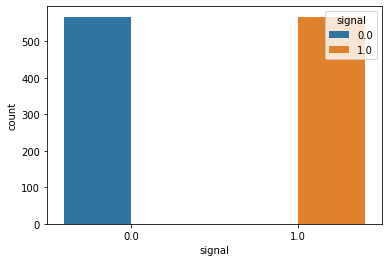

In [18]:
sns.countplot(x = 'signal', data=newdf, hue='signal')
plt.show()

# Machine Learning Model
For this project a neural will used as Model to predict if a price will fall or raise.

In [19]:
# Date as column for because of it's usage in the model
#newdf.reset_index(level=0, inplace=True)

In [20]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1132 entries, 2021-01-23 to 2017-12-19
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   high         1132 non-null   float64
 1   low          1132 non-null   float64
 2   settle       1132 non-null   float64
 3   Volume USDT  1132 non-null   float64
 4   5EMA         1132 non-null   float64
 5   10EMA        1132 non-null   float64
 6   rsi          1132 non-null   float64
 7   Std_dev      1132 non-null   float64
 8   ROC          1132 non-null   float64
 9   Williams%R   1132 non-null   float64
 10  signal       1132 non-null   float64
dtypes: float64(11)
memory usage: 146.1 KB


In [21]:
# Split Dataset into Training & Testing
# Because we also use date column for training
#btc_train = newdf.head(632)
#btc_test = newdf.tail(500)

In [22]:
# Split Dataset
X = newdf[['high', 'low', 'settle', '5EMA', 'Volume USDT',
           '10EMA', 'rsi', 'Std_dev', 'ROC', 'Williams%R']]
y = newdf[['signal']]

train_X, test_X, train_y, test_y = train_test_split(X.copy(), y.copy(), test_size=0.3, shuffle=False)
print(f'Trainingset size: {len(train_X)}')
print(f'Testingset size: {len(test_X)}')
#print(train_X)

Trainingset size: 792
Testingset size: 340


In [23]:
'''# Modell trainieren und testen
nn = MLPClassifier(activation='relu',solver='lbfgs', alpha=1e-5,
                   epsilon=1e-08, hidden_layer_sizes=(5, 2), learning_rate='constant',
                   learning_rate_init=0.001, max_iter=200, random_state=1, shuffle=False)
nn.fit(train_X, train_y)
prediction = nn.predict(test_X)'''

"# Modell trainieren und testen\nnn = MLPClassifier(activation='relu',solver='lbfgs', alpha=1e-5,\n                   epsilon=1e-08, hidden_layer_sizes=(5, 2), learning_rate='constant',\n                   learning_rate_init=0.001, max_iter=200, random_state=1, shuffle=False)\nnn.fit(train_X, train_y)\nprediction = nn.predict(test_X)"

In [24]:
'''# Accuracy
acc = accuracy_score(test_y, prediction)

acc = acc * 100
print('Accuracy: ', "%.1f" % acc)


# Erstellen und anzeigen der Confusion-Matrix
def print_metrics(df, predicted):
    # Confusion Matrix
    y_actu = pd.Series(df['signal'], name='Actual')
    y_pred = pd.Series(df[predicted], name='Predicted')
    df_conf = pd.crosstab(y_actu, y_pred)
    display(df_conf)


# Erstellen einer Confusion-Matrix
newdf = pd.DataFrame(data=test_y)
newdf['Predicted'] = prediction
print_metrics(newdf, 'Predicted')

# Anzeigen der Precision, Recall und des F1-Scores für die jeweiligen Klassen
#print(classification_report(test_y, prediction, target_names=[1.0, 0.0]))'''

'# Accuracy\nacc = accuracy_score(test_y, prediction)\n\nacc = acc * 100\nprint(\'Accuracy: \', "%.1f" % acc)\n\n\n# Erstellen und anzeigen der Confusion-Matrix\ndef print_metrics(df, predicted):\n    # Confusion Matrix\n    y_actu = pd.Series(df[\'signal\'], name=\'Actual\')\n    y_pred = pd.Series(df[predicted], name=\'Predicted\')\n    df_conf = pd.crosstab(y_actu, y_pred)\n    display(df_conf)\n\n\n# Erstellen einer Confusion-Matrix\nnewdf = pd.DataFrame(data=test_y)\nnewdf[\'Predicted\'] = prediction\nprint_metrics(newdf, \'Predicted\')\n\n# Anzeigen der Precision, Recall und des F1-Scores für die jeweiligen Klassen\n#print(classification_report(test_y, prediction, target_names=[1.0, 0.0]))'

In [25]:
# determine the number of input features
n_features = train_X.shape[1]
# define model
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# fit the model
model.fit(train_X, train_y, epochs=150, batch_size=32, verbose=2)

Epoch 1/150
25/25 - 0s - loss: 43.8550 - accuracy: 0.4962
Epoch 2/150
25/25 - 0s - loss: 28.7307 - accuracy: 0.5303
Epoch 3/150
25/25 - 0s - loss: 17.0427 - accuracy: 0.5581
Epoch 4/150
25/25 - 0s - loss: 7.8122 - accuracy: 0.6035
Epoch 5/150
25/25 - 0s - loss: 5.4471 - accuracy: 0.6591
Epoch 6/150
25/25 - 0s - loss: 4.8233 - accuracy: 0.6793
Epoch 7/150
25/25 - 0s - loss: 4.1175 - accuracy: 0.7058
Epoch 8/150
25/25 - 0s - loss: 3.5543 - accuracy: 0.6944
Epoch 9/150
25/25 - 0s - loss: 3.0529 - accuracy: 0.7172
Epoch 10/150
25/25 - 0s - loss: 2.6955 - accuracy: 0.7083
Epoch 11/150
25/25 - 0s - loss: 2.3179 - accuracy: 0.7197
Epoch 12/150
25/25 - 0s - loss: 2.0177 - accuracy: 0.7210
Epoch 13/150
25/25 - 0s - loss: 1.9621 - accuracy: 0.7172
Epoch 14/150
25/25 - 0s - loss: 1.7935 - accuracy: 0.7311
Epoch 15/150
25/25 - 0s - loss: 1.6681 - accuracy: 0.7399
Epoch 16/150
25/25 - 0s - loss: 1.9470 - accuracy: 0.7487
Epoch 17/150
25/25 - 0s - loss: 1.7022 - accuracy: 0.7601
Epoch 18/150
25/25 -

Epoch 142/150
25/25 - 0s - loss: 0.4353 - accuracy: 0.8371
Epoch 143/150
25/25 - 0s - loss: 0.5338 - accuracy: 0.7992
Epoch 144/150
25/25 - 0s - loss: 0.6221 - accuracy: 0.8169
Epoch 145/150
25/25 - 0s - loss: 0.4461 - accuracy: 0.8056
Epoch 146/150
25/25 - 0s - loss: 0.5085 - accuracy: 0.8131
Epoch 147/150
25/25 - 0s - loss: 0.4497 - accuracy: 0.8333
Epoch 148/150
25/25 - 0s - loss: 0.4458 - accuracy: 0.8081
Epoch 149/150
25/25 - 0s - loss: 0.7293 - accuracy: 0.7879
Epoch 150/150
25/25 - 0s - loss: 0.6743 - accuracy: 0.8144


In [27]:
# evaluate the model
loss, acc = model.evaluate(test_X, test_y, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.818
